In [1]:
!pip install lxml
import lxml
import pandas as pd
from pandas import Series, DataFrame
import time
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [116]:
!pip install squarify
!pip install plotly
import squarify
import sklearn
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as g_obj

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 36.9MB 16kB/s  eta 0:00:01
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
# look at the first few rows

# Slicingn of dataframe
df_1 = bitcoin_market_info
bitcoin = DataFrame(df_1, columns=['Date', 'Market Cap'])
bitcoin.insert(1, 'Name', 'Bitcoin')
bitcoin =  DataFrame(bitcoin, columns=['Name', 'Market Cap'])
bitcoin.head()

,Name,Market Cap
0,Bitcoin,110582598384
1,Bitcoin,113338906417
2,Bitcoin,109151601195
3,Bitcoin,108335763931
4,Bitcoin,107070056730


In [15]:
# get market info for Ethereum from the start of 2016 to the current day
ether_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
ether_market_info = ether_market_info.assign(Date=pd.to_datetime(ether_market_info['Date']))
ether_market_info['Volume'] = ether_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
ether_market_info.columns = ether_market_info.columns.str.replace("*", "")
# look at the first few rows

# Slicingn of dataframe
df_2 = ether_market_info
ether = DataFrame(df_2, columns=['Date', 'Market Cap'])
ether.insert(1, 'Name', 'Ether')
ether =  DataFrame(ether, columns=['Name', 'Market Cap'])
ether.head()


,Name,Market Cap
0,Ether,29984192045
1,Ether,32119577919
2,Ether,29162476049
3,Ether,28655663078
4,Ether,28411365408


In [103]:
# get market info for Ethereum from the start of 2016 to the current day
xrp_market_info = pd.read_html("https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
xrp_market_info = xrp_market_info.assign(Date=pd.to_datetime(ether_market_info['Date']))
#xrp_market_info['Volume'] = xrp_market_info['Volume'].astype('int64')
# this will remove those asterisks
xrp_market_info.columns = xrp_market_info.columns.str.replace("*", "")
# look at the first few rows

# Slicingn of dataframe
df_3 = xrp_market_info
xrp = DataFrame(df_3, columns=['Date', 'Market Cap'])
xrp.insert(1, 'Name', 'Xrp')
xrp =  DataFrame(xrp, columns=['Name', 'Market Cap'])
xrp.head()

,Name,Market Cap
0,Xrp,12889055633
1,Xrp,14293247833
2,Xrp,11528558090
3,Xrp,11104340439
4,Xrp,10898166615


In [104]:
# Merge 3 Dfs
df_new = pd.concat([bitcoin, ether, xrp])
df_new.head()

,Name,Market Cap
0,Bitcoin,110582598384
1,Bitcoin,113338906417
2,Bitcoin,109151601195
3,Bitcoin,108335763931
4,Bitcoin,107070056730


In [110]:
test = df_new.drop(df_new.index[[3048]])
test_2_market = test['Market Cap'].astype('int64')
test_2_name = test['Name'].astype('str')

merged = pd.concat ([test_2_name,test_2_market], axis = 1)

Name          object
Market Cap     int64
dtype: object

In [112]:
merged["Label"] = merged["Name"] + " \n $" + merged["Market Cap"].map('{:,}'.format).astype("str")
merged.head()

,Name,Market Cap,Label
0,Bitcoin,110582598384,"Bitcoin \n $110,582,598,384"
1,Bitcoin,113338906417,"Bitcoin \n $113,338,906,417"
2,Bitcoin,109151601195,"Bitcoin \n $109,151,601,195"
3,Bitcoin,108335763931,"Bitcoin \n $108,335,763,931"
4,Bitcoin,107070056730,"Bitcoin \n $107,070,056,730"


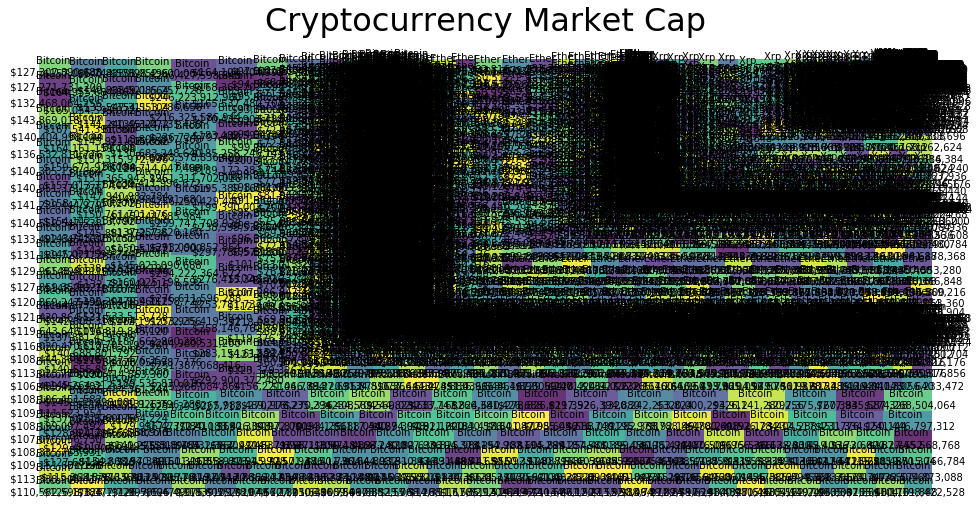

In [118]:
fig, ax = plt.subplots(figsize=(16,8))
squarify.plot(sizes=merged['Market Cap'], label=merged['Label'], alpha=.8 )
plt.axis('off')
plt.rc('font', size=10)  
plt.title("Cryptocurrency Market Cap", fontsize=32, color="Black")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.show()